# Linear regression on trees

In [15]:
library(ggplot2)

In [16]:
myData=read.table(file="data/arbres-tot.csv",sep=";",skip=3,header=TRUE)
myData=myData[myData$X10!=0,]

myData

,X139244,Arbre,Jardin,PARIS.16E.ARRDT,X,X.1,SQUARE.ROGER.COQUOIN...14.AVENUE.FERDINAND.BUISSON,X000101025,Epicéa,Picea,abies,X.2,X70,X10,Jeune..arbre.Adulte,NON,X6859769.8839.645337.503999
,<int>,<fct>,<fct>,<fct>,<fct>,<lgl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<fct>
1,2015711,Arbre,Jardin,BOIS DE VINCENNES,,NA,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,00320021,Epicéa,Picea,abies,,105,17,Adulte,NON,"6859673.2219,659205.991999"
2,187466,Arbre,DASCO,PARIS 20E ARRDT,,NA,ECOLE MATERNELLE / 94 RUE COURONNES,084704008,Epicéa,Picea,abies,,90,8,Jeune (arbre)Adulte,NON,"6863517.0009,655067.059999"
3,160479,Arbre,CIMETIERE,SEINE-SAINT-DENIS,,NA,CIMETIERE DE PANTIN / DIV 144,D00000144023,Epicéa,Picea,abies,,30,4,,,"6867548.54989,657446.925999"
5,191107,Arbre,DASCO,PARIS 15E ARRDT,,NA,ECOLE MATERNELLE / 35 AVENUE EMILE ZOLA,070801005,Epicéa,Picea,abies,,50,9,Jeune (arbre),NON,"6860963.95689,647282.543999"
6,160477,Arbre,CIMETIERE,SEINE-SAINT-DENIS,,NA,CIMETIERE DE PANTIN / DIV 25,D00000025010,Epicéa,Picea,abies,,160,15,,,"6867611.09989,656435.042999"
7,2033520,Arbre,DJS,SEINE-SAINT-DENIS,TENNIS,NA,PARC DES SPORTS INTERDEPARTEMENTAL DE BOBIGNY / 40 AVENUE DE LA DIVISION LECLERC - BOBIGNY,000206002,Epicéa,Picea,abies,,20,5,,NON,"6867826.3919,657590.646999"
8,197767,Arbre,DJS,PARIS 12E ARRDT,,NA,CENTRE SPORTIF PAUL VALERY / 15 RUE DE LA NOUVELLE CALEDONIE,00320005,Epicéa,Picea,pungens,,70,10,Jeune (arbre)Adulte,NON,"6859943.9599,656755.693999"
9,2012242,Arbre,Jardin,BOIS DE VINCENNES,,NA,INSEP / AVENUE DU TREMBLAY,00090049,Epicéa,Picea,abies,,90,10,Adulte,NON,"6859465.63589,659515.347999"
10,111622,Arbre,Jardin,PARIS 19E ARRDT,,NA,PARC DES BUTTES CHAUMONT,E0230026,Epicéa,Picea,abies,,20,3,,,"6864674.80389,654966.785999"


## 1. Simple regression

Point Cloud

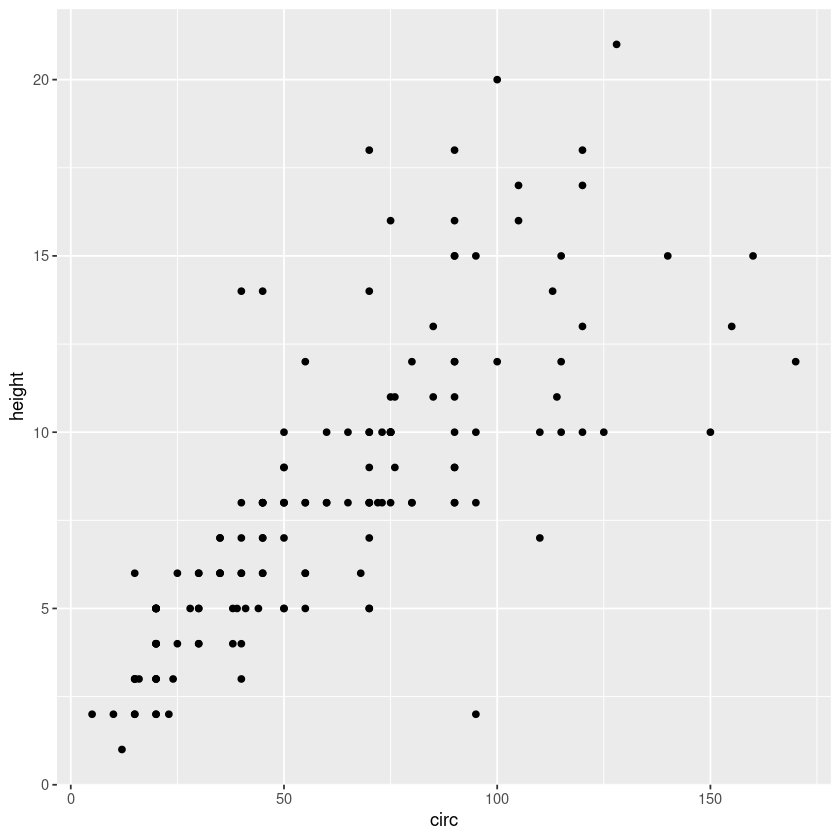

In [17]:
circ=myData$X70
height=myData$X10
ggplot(myData, aes(x=circ,y=height)) + geom_point() + xlab("circ") + ylab("height")

In [18]:
simple_reg <- lm(height~circ,data=myData)
names(simple_reg)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [19]:
anova(simple_reg)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
circ,1,1508.127,1508.12710,197.569,4.820989e-29
Residuals,148,1129.746,7.63342,NA,NA


In [20]:
summary(simple_reg)


Call:
lm(formula = height ~ circ, data = myData)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.2321 -1.6180 -0.2804  1.1280  9.0187 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.679057   0.455838   5.877 2.66e-08 ***
circ        0.090032   0.006405  14.056  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.763 on 148 degrees of freedom
Multiple R-squared:  0.5717,	Adjusted R-squared:  0.5688 
F-statistic: 197.6 on 1 and 148 DF,  p-value: < 2.2e-16


Simple line regression

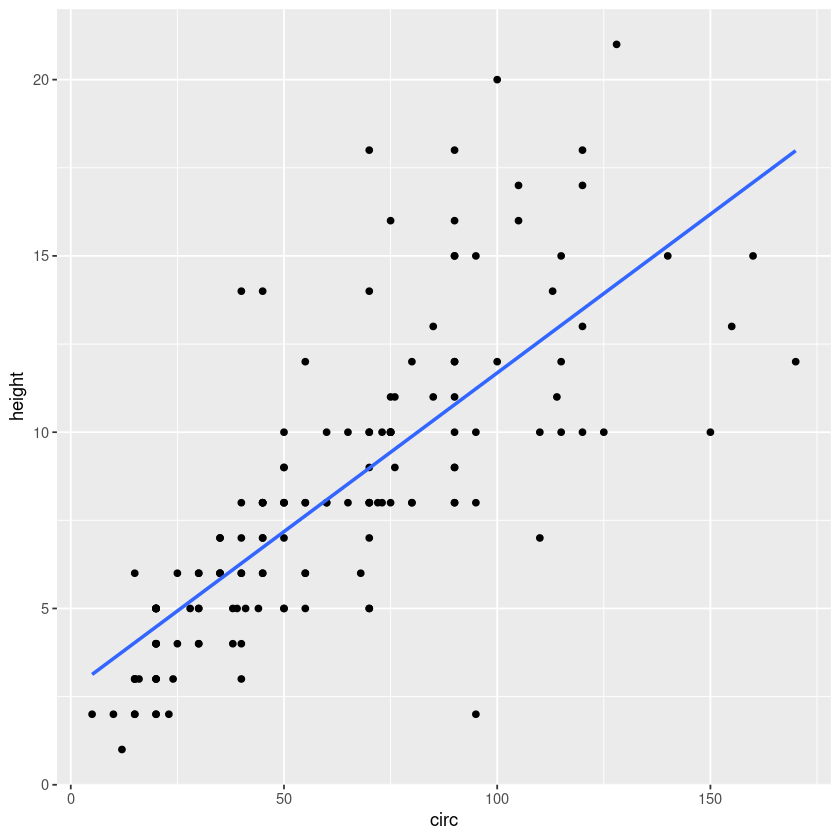

In [21]:
ggplot(myData,aes(x=circ,y=height))+ geom_point()+
stat_smooth(method="lm",se=FALSE)+ xlab("circ")+
ylab("height")

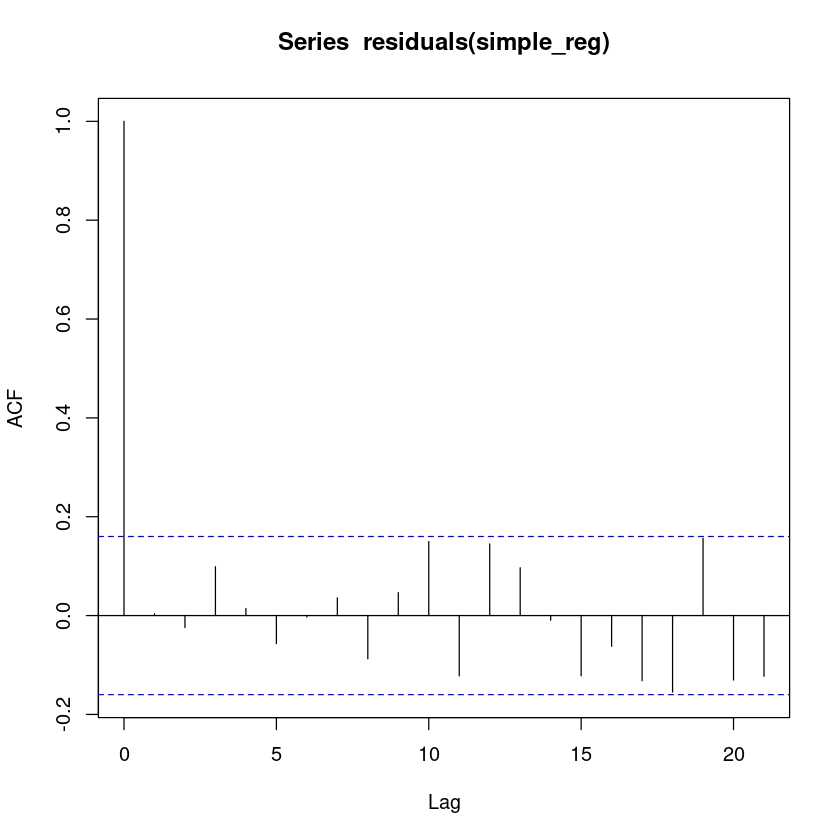

In [22]:
acf(residuals(simple_reg))

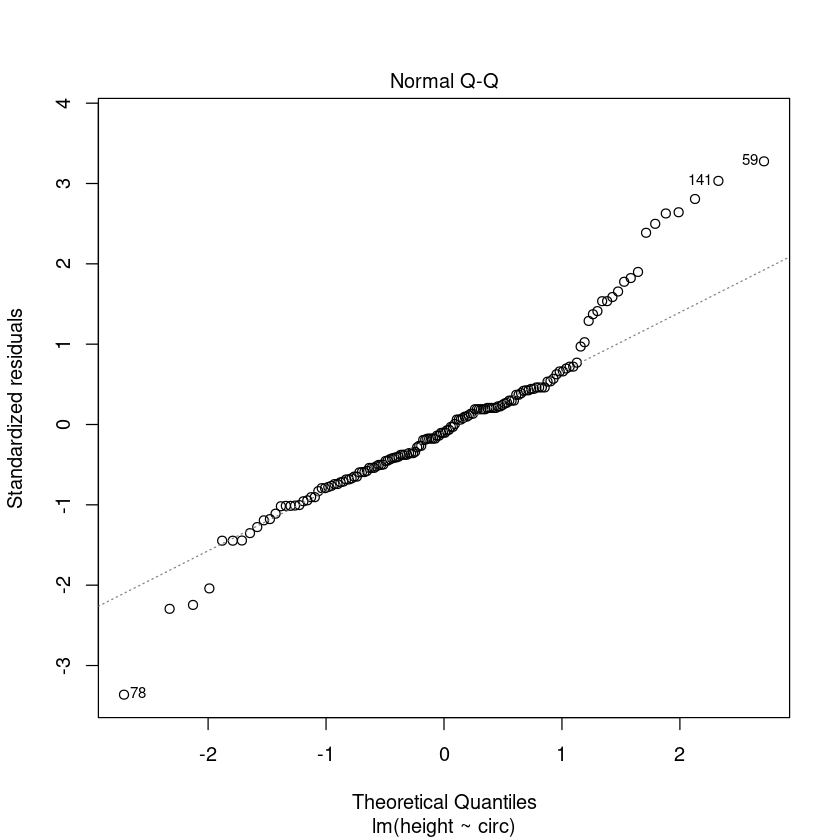

In [23]:
plot(simple_reg,2)

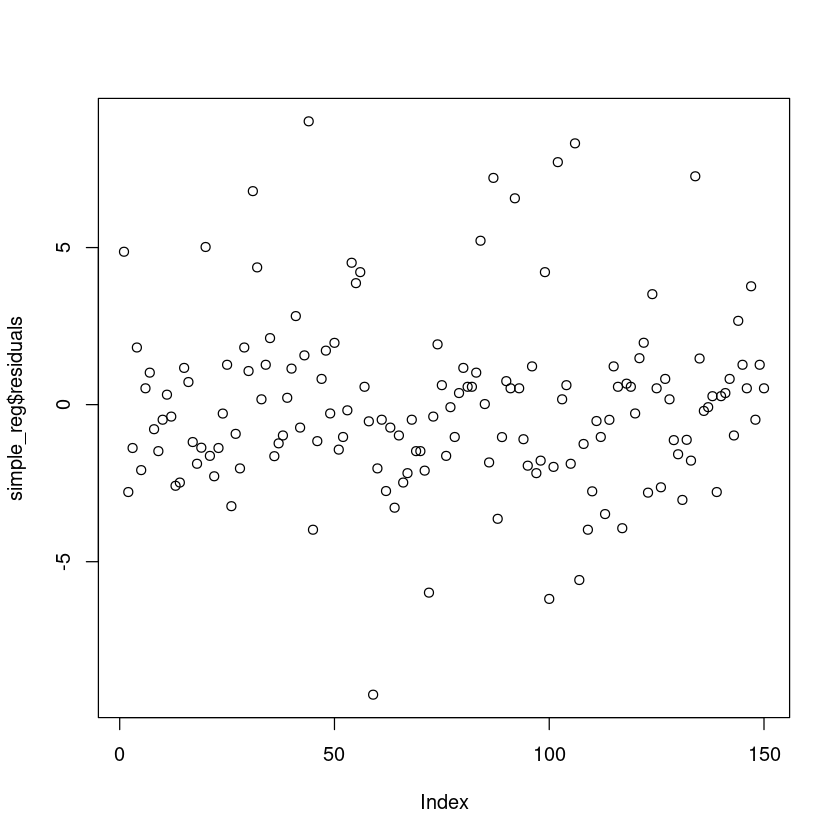

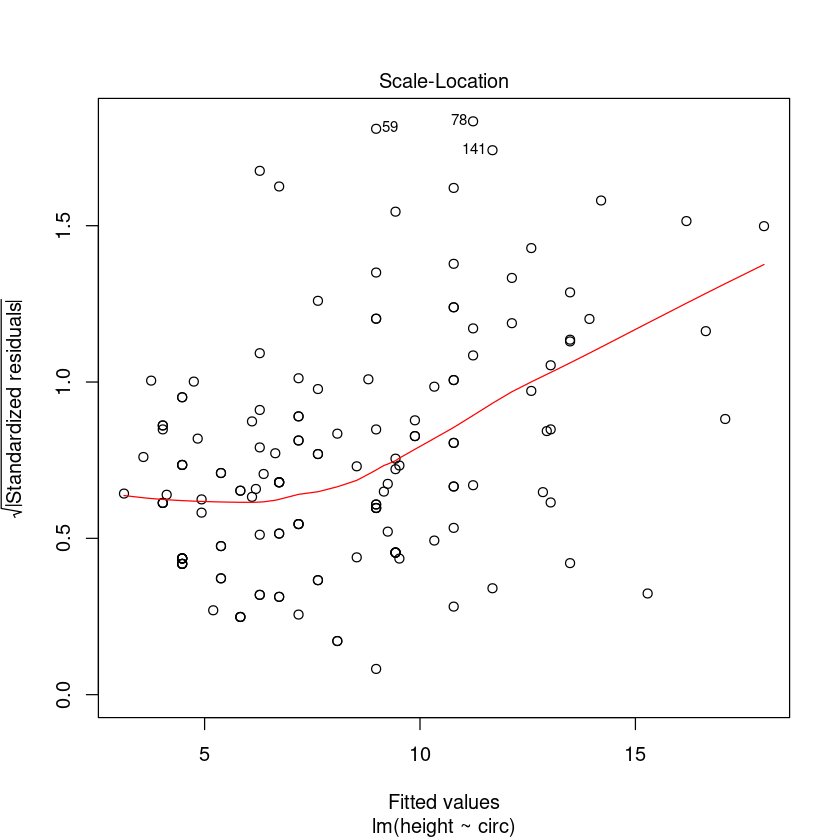

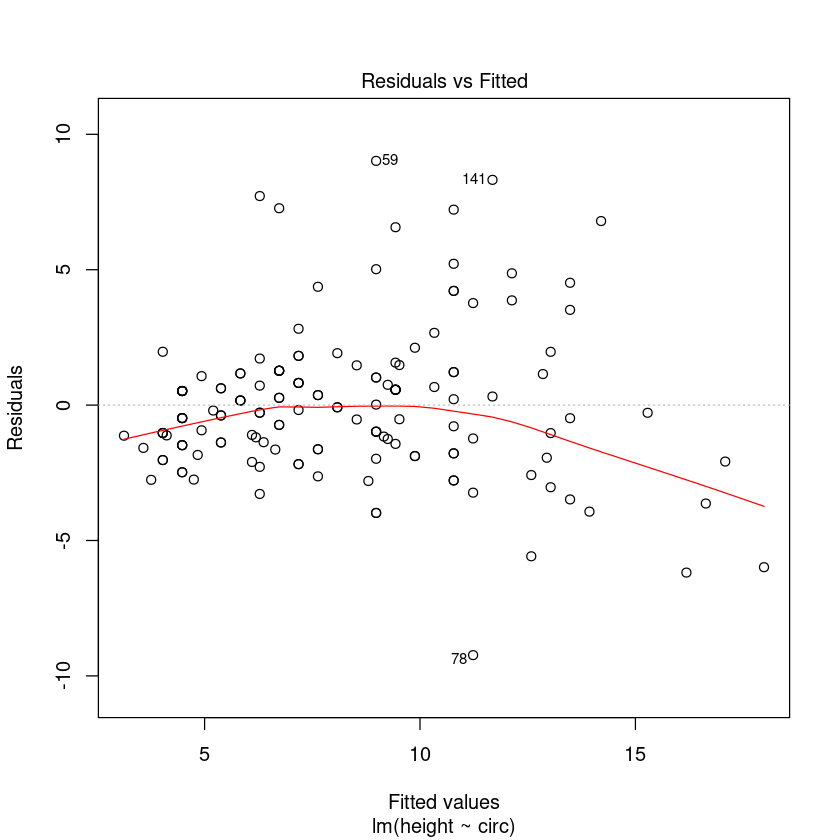

In [24]:
plot(simple_reg$residuals)
plot(simple_reg,3)
plot(simple_reg,1)

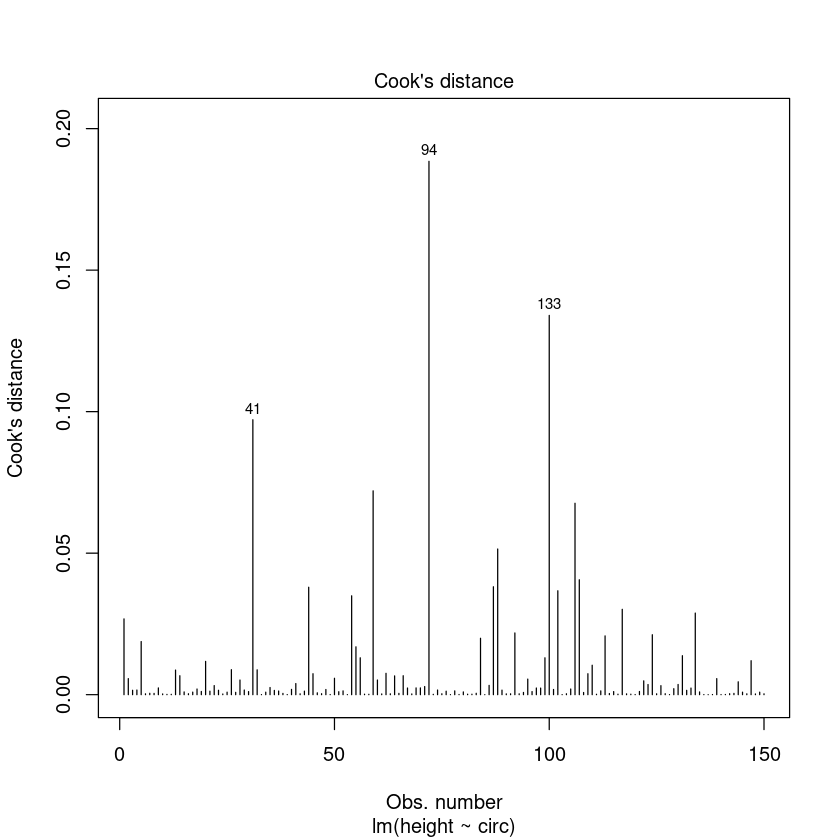

In [25]:
plot(simple_reg,4)

In [26]:
predict(simple_reg, data.frame(circ=10), interval="prediction")

,fit,lwr,upr
1,3.579382,-1.937705,9.09647


## 2. Multivariate regression

Based on the circumference and the circumference square root

In [27]:
myData$circ_sqrt <- sqrt(myData$X70)

multi_reg <- lm(height~circ+circ_sqrt,data=myData)
summary(multi_reg)


Call:
lm(formula = height ~ circ + circ_sqrt, data = myData)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.4182 -1.5795 -0.0383  0.9617  8.4205 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -3.96947    2.05237  -1.934  0.05502 . 
circ        -0.02947    0.03656  -0.806  0.42149   
circ_sqrt    1.86596    0.56255   3.317  0.00115 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.674 on 147 degrees of freedom
Multiple R-squared:  0.6015,	Adjusted R-squared:  0.5961 
F-statistic:   111 on 2 and 147 DF,  p-value: < 2.2e-16


Based only on the square root

In [28]:
multi_reg_2 <- lm(height~circ_sqrt,data=myData)
summary(multi_reg_2)


Call:
lm(formula = height ~ circ_sqrt, data = myData)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.4017 -1.5133 -0.0729  1.0343  8.5568 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.42957    0.74930  -3.242  0.00146 ** 
circ_sqrt    1.41906    0.09528  14.893  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.671 on 148 degrees of freedom
Multiple R-squared:  0.5998,	Adjusted R-squared:  0.5971 
F-statistic: 221.8 on 1 and 148 DF,  p-value: < 2.2e-16


> The error coefficient is smaller using only the circumference square root 

Regression Curve

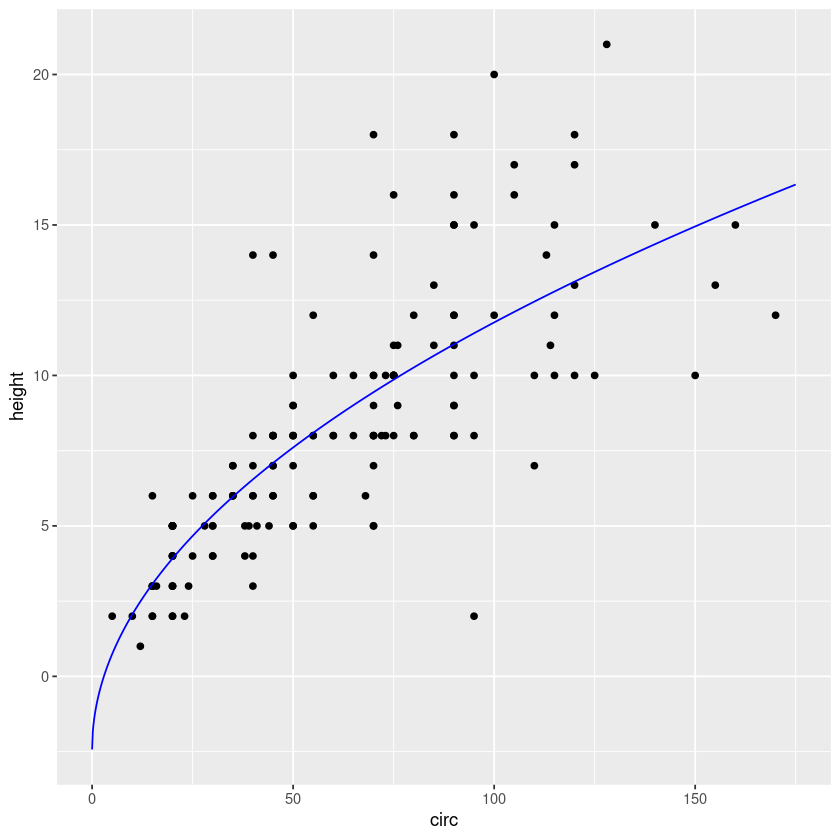

In [29]:
circ_pred <- seq(0,175,len=1000)
height_pred <- multi_reg_2$coefficients[1]+multi_reg_2$coefficients[2]*sqrt(circ_pred)
fct_reg <- data.frame(circ_pred=circ_pred,height_pred=height_pred)
ggplot()+
geom_point(data=myData,aes(x=circ,y=height))+
geom_line(data=fct_reg,aes(x=circ_pred,y=height_pred),col="blue")+
stat_smooth(method="lm",se=FALSE)+
xlab("circ")+
ylab("height")